NYC AirBNB Price Prediction Capstone

As part of my first capstone project, I’m working on exploring my dataset and finding interesting results. My dataset contains information from AirBnB about listings in New York City and contains 48858 rows and 18 columns. The goal of this project is  to accurately predict the Price for a listing based on the featured variables on the dataset.

In [142]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats import weightstats as ws
from scipy.stats import t
from scipy import stats
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import cm
from matplotlib.pyplot import figure
import pylab
from sklearn import metrics
import seaborn as sns

Data Wrangling - NYC AirBnB Dataset

In [71]:
df = pd.read_csv('c:\\Users\Jun\Downloads\AirBNB_NYC_DS.csv', parse_dates = ['last_review'])
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [72]:
df['reviews_per_month_isnull'] = df['reviews_per_month'].isnull().astype(int)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_isnull
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,1


In [73]:
df['reviews_per_month'][df['reviews_per_month'].isnull()] = 0
df

C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_isnull
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,0.00,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,0.00,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,0.00,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,0.00,6,2,1


In [74]:
df['last_review'] = df['last_review'].fillna(method='ffill')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_isnull
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,0.00,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,0.00,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,0.00,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,0.00,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,0.00,6,2,1


In [75]:
df['last_review'] = pd.to_datetime(df['last_review'])


In [76]:
df = df.drop_duplicates(keep=False)
df #Using drop_duplicates, I'm checking to see if we have any duplicate rows. None were dropped

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_isnull
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,0.00,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,0.00,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,0.00,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,0.00,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,0.00,6,2,1


In [77]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_isnull
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.205583
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.404131
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,0.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.000000


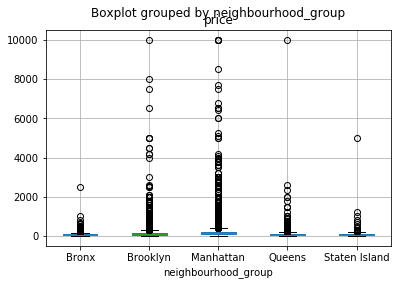

In [78]:
df.boxplot(column='price', by='neighbourhood_group')
#After graphing our table using a boxplot, its obvious that Brooklyn, Manhattan, and Queens, each have several outliers. Although, they are most likely valid, as Airbnb host an wide variety of locales, including but not limited to boats, high end apartments, penthouses. 

In [79]:
df.info() #checking the current state of the dataframe to ensure that the values are consistent. Looks like there may be some issues with 'name' and 'host_name' althought his maybe a consequence of a user with multiple listings and the same generic description


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [80]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

In [81]:
assert df.notnull().all().all() #using assert I checked if there are still any null values in my data set. 

In [82]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_isnull
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,0.00,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-07-08,0.00,2,9,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-07-08,0.00,2,36,1
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-07-08,0.00,1,27,1
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-07-08,0.00,6,2,1


In [83]:
print(df.info())
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'])
print(type(df['minimum_nights']))
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48858 non-null  int64         
 1   name                            48858 non-null  object        
 2   host_id                         48858 non-null  int64         
 3   host_name                       48858 non-null  object        
 4   neighbourhood_group             48858 non-null  object        
 5   neighbourhood                   48858 non-null  object        
 6   latitude                        48858 non-null  float64       
 7   longitude                       48858 non-null  float64       
 8   room_type                       48858 non-null  object        
 9   price                           48858 non-null  int64         
 10  minimum_nights                  48858 non-null  int64         
 11  nu

C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
df.to_csv('Wrangled_df.csv') #I'm converting the time series to something useable in 'time since collection', which is the current date ->
#-> minus the earliest one in the dataset. So the larger the number the more recent the review

In [85]:
last_rev_min  = min(df['last_review'])
last_rev_min

Timestamp('2011-03-28 00:00:00')

In [86]:
days_since_first_rev = df['last_review'] - last_rev_min
df['time_since_collection'] = days_since_first_rev.dt.days

C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Price')

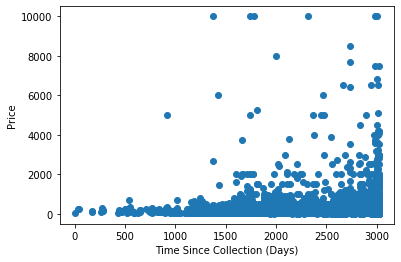

In [87]:
plt.scatter(df['time_since_collection'], df['price'])
plt.xlabel('Time Since Collection (Days)')
plt.ylabel('Price')

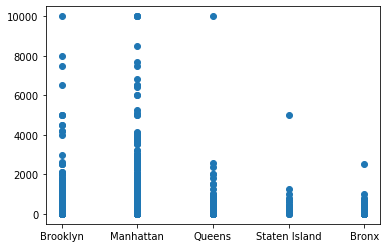

In [88]:
plt.scatter(df['neighbourhood_group'], df['price'])

Data Story

To start off with, I imported my dataset from the ‘Wranged_df.csv” and I used “df.info()” to obtain a breakdown of my data set, and their datatype (Dtype, cell 5). Based, on the summary provided, I decided to focus on the featured variables, “neighbourhood_group”, “neighbourhood”, “latitude”, “longitude”, “minimum_nights”, “number of reviews”, “reviews_per_month”, “calculated_host_listings_count”, and “availability_365”.

The first variable we looked at was “number_of_reviews”. I plotted it against the “price” variable, using a scatter plot, and from the shape of the graph, there is a very steep but apparently negative relationship, in the form of a curve. This is an interesting find, and something that we will keep in mind for further review. 

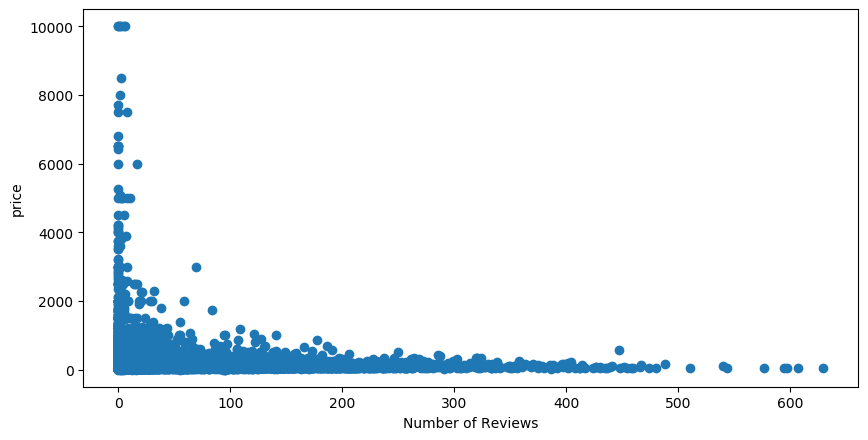

In [89]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='y')
plt.scatter(df['number_of_reviews'], df['price'])
plt.xlabel('Number of Reviews')#From our initial review of the data, one of the variables that stood out to me, was the Number of Reviews. Over the last few years I have done a bit of traveling, so I'm somewhat familar with shopping for hotels and AirBnBs. The most popular ones tend to be in a lower price range, and have numerous reviews. Compared to some of the higher end ones, which are more exclusvely for large or major events like weddings, parties, or maybe a company retreat. 
plt.ylabel('price')#Based on the scatterplot depicting our Number of reviews and price, there seems to be a negative linear relationship between the number of reviews and price. As the more reviews there are there tends to be a lower price. From the information I've gathered, the listings that have the most reviews, tend to be lower in price. This means, that visitors to NY tend to aim for listings that are comparable to local hotels. 
plt.show()

Moving on, the next variable I looked at was, the “calculated_host_listings_count”, which is a measure how how many listings that given host had.  Plotting a scatter plot between this and ‘price’ (cell 9) does not show a clear pattern.

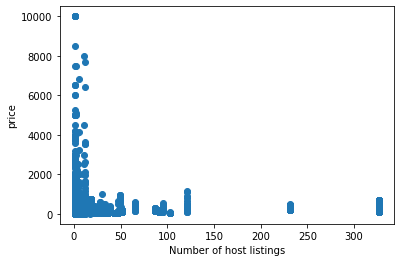

In [90]:
plt.scatter(df['calculated_host_listings_count'], df['price'])
plt.xlabel('Number of host listings')
plt.ylabel('price')#Comparing the number of host listings to the price, does not yield any conclusive results. From the scatter plot it appears we may have some high outliers in users with ~0-20 listings, but from what we can gauge, there is no definitive pattern. 
plt.show()

The next variable we used was the ‘availability_365’ column. This variable is a breakdown, of how often an AirBnB was available out of the year. Plotting this data against our ‘price’ variable, proved inconclusive, as there were no clear patterns or relationships between the two. 

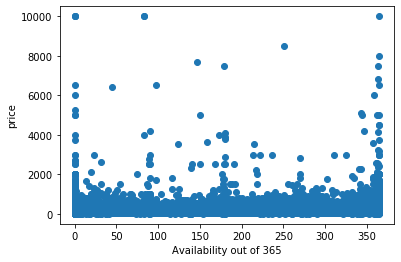

In [91]:
plt.scatter(df['availability_365'], df['price'])
plt.xlabel('Availability out of 365')
plt.ylabel('price')#Using the availability variable doesn't provide any new information, as the data is inconclusive. However, we are able to know for sure that how available a AirBnB is would not have a significant affect on the price. 
plt.show()

Geographically, New York City is broken down into 5 boroughs, or in this case “neighbourhood_groups”. Using the data provide, I plotted three separate scatter plots, one for ‘latitude”, ‘longitude’ and ‘neighbourhood_group’. Based on the graphs that were generated, there wasn’t a clear linear relationship between these variable and the price. However, what I did discover, was that the closer you get to central NYC, (mainly Manhattan and Brooklyn) the higher the prices tended to trend. While this may not help our Linear Regression model, it is an interesting data fact, and relevant to potential visitors. I’ve also included a map of NYC’s boroughs for reference below. 

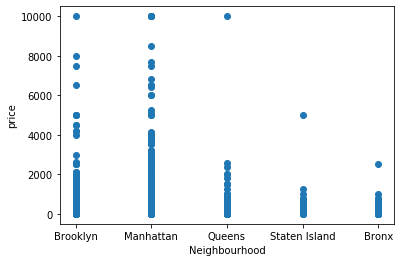

In [92]:
plt.scatter(df['neighbourhood_group'], df['price'])
plt.xlabel('Neighbourhood')
plt.ylabel('price')#
plt.show()

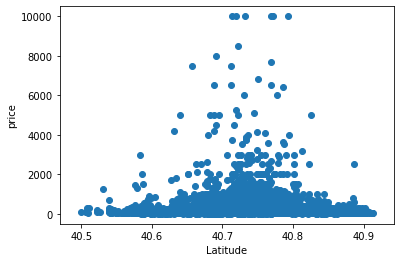

In [93]:
plt.scatter(df['latitude'], df['price'])
plt.xlabel('Latitude')
plt.ylabel('price')#
plt.show()

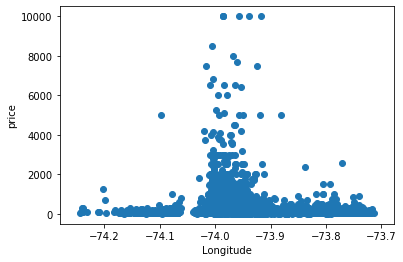

In [94]:
plt.scatter(df['longitude'], df['price'])
plt.xlabel('Longitude')
plt.ylabel('price')#
plt.show()

Inital Findings

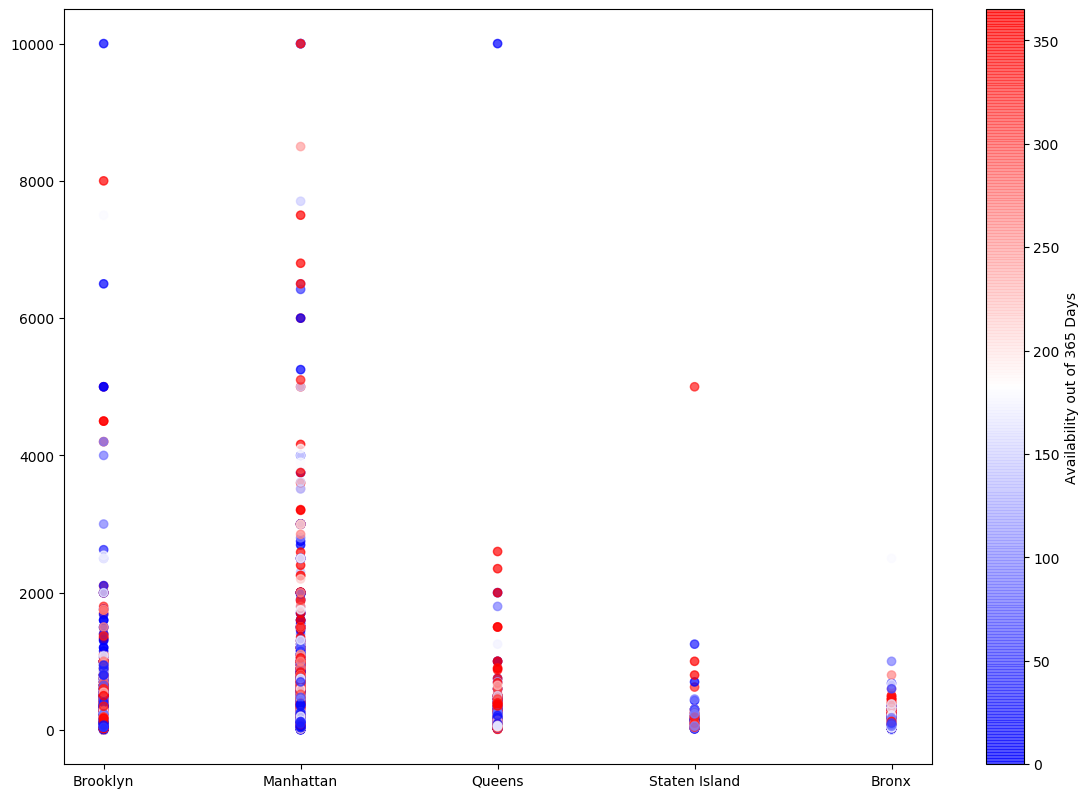

In [95]:
figure(num=None, figsize=(14, 10), dpi=100, facecolor='w', edgecolor='y')
avail_365 = plt.scatter(df['neighbourhood_group'], df['price'], c=df['availability_365'], cmap='bwr', alpha=0.7)
plt.colorbar(avail_365, label="Availability out of 365 Days")
plt.show()

#Comparing Neighbourhood Group vs Price with a heatmap of the Availibility of each unit/365 days. 

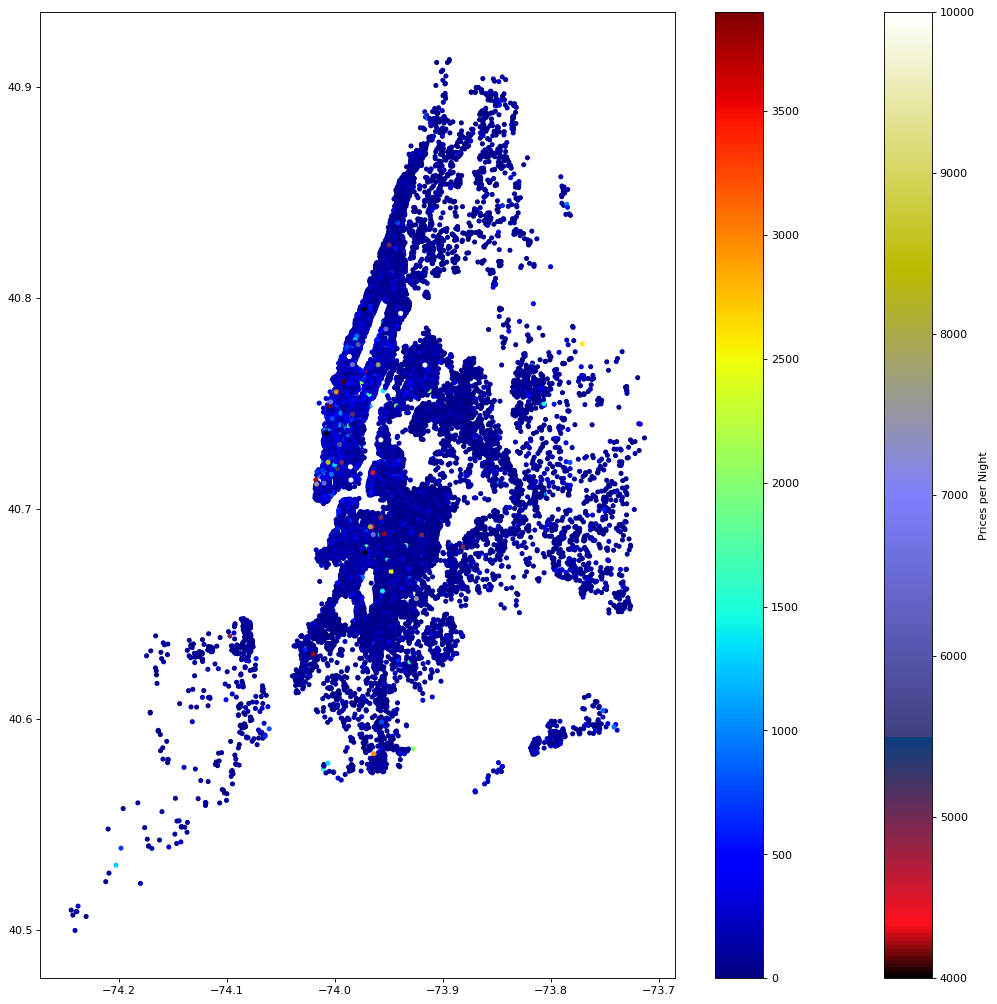

In [96]:
z = [i for i in df['price'] if i >= 4000]
z

x = [i for i in df['price'] if i < 4000]
x

figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='y')

price = plt.scatter(df['longitude'][df.price < 4000], df['latitude'][df.price < 4000], c=x, s=50, cmap='jet', marker='.')
price2 = plt.scatter(df['longitude'][df.price >= 4000], df['latitude'][df.price >= 4000], c=z, s=50, cmap='gist_stern', marker='.')

plt.colorbar(price2, label="Prices per Night")
plt.colorbar(price)

plt.show()

#Heatmap of prices in the NYC area

Statistical Data Analysis

As part of my project on predicting AirBNB prices in NYC, I went through the data and explored a vast number of variables and potential connections. One of the more interesting statistics that stood out to me during this process was the price in NYC of renting a room vs a whole apt. Based on our everyday assumptions, renting out an apartment should be more expensive, due to the size of the unit, and the privacy it provides, whereas renting a room you will have less space and you would need to share a public space with co tenants. Of course this isn’t as simple for a city like NYC, where particular boroughs are more expensive (please see attached notebook for reference).

For our statistical review, we will set the null hypothesis (Ho) as there is no difference between the price for a whole apartment and a room in NYC, whereas our alternative hypothesis (H1) is that renting a room in NYC is less expensive. Note, in our data set there is also a 3rd type of listing where you would rent to share a room with more tenants. For the purpose of our statistical analysis, I will omit this because there were only 1159 shared room listings, and from our EDA none of these listings had a price of more than 2000 USD, compared to our apartment listings (25393 listings), and room listings (22306 listings) which were more spread out in their price. 

To complete the analysis, i pulled data from the ‘Price’ column of the data set, and separated it by ‘Private room’ and ‘Entire home/apt’ , using “l = df.price[df.room_type == 'Private room']
m = df.price[df.room_type == 'Entire home/apt']”. As we have all the data from Airbnb, circa 2017 - 2019 for the NYC area, it is assumed that we have a full population, and thus for my analysis, I will use the Z score instead of the T score. For the next step, I had to do some research and find a python function that will allow me to compare the two data sets. It ultimately came down to using ‘stats.ztest()’ or ‘stats.ComepareMeans.ztest_ind()’. Both of these functions allow me to compare the means fo the two data sets, but ztest assumes that the standard deviation is the same, whereas ztest_ind, does not, so it was chosen as the method used. 

After running our formula, the results we received was tstat = 58.631293966982135, with a p value of 0.0. Interpreting our results, due to the small p value, we will reject the null hypothesis here that the cost is the same in NYC  for whole apartments and single rooms. In terms of our analysis we can conclusively say that there is a difference in cost between renting a whole apartment and renting a single room. 


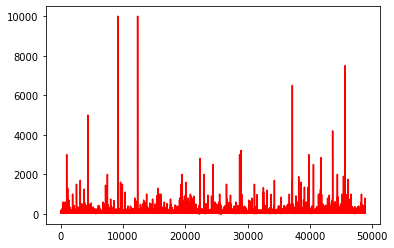

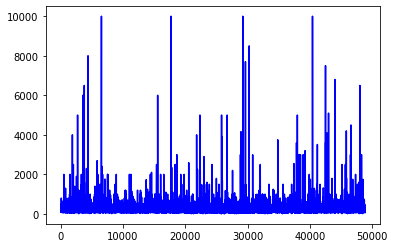

In [97]:
room = df.price[df.room_type == 'Private room']
apt = df.price[df.room_type == 'Entire home/apt']

plt.plot(room, color='red')
plt.show()
plt.plot(apt, color='blue')

plt.show()

In [98]:

y = sm.stats.CompareMeans.from_data(apt, room).ztest_ind(usevar='unequal')
print(y)


(58.631293966982135, 0.0)


Results and In-Depth Analysis

Test Score -0.0011840564514284946
Train Score 0.002133919288945907


<function matplotlib.pyplot.show(*args, **kw)>

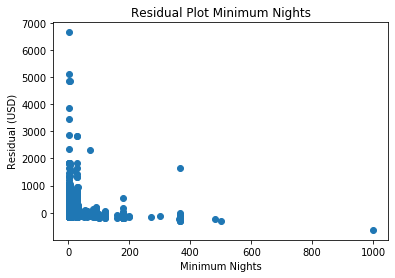

In [170]:
min_night = ['minimum_nights']
target = ['price']
linregs = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[min_night], df[target], test_size=0.25)
linregs.fit(X_train, y_train)
random.seed(0)
pred_price = linregs.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregs.score(X_test, y_test))
print("Train Score", linregs.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Minimum Nights")
plt.xlabel("Minimum Nights")
plt.ylabel("Residual (USD)")
plt.show


Test Score 0.002627513357066902
Train Score 0.002192467770286588


<function matplotlib.pyplot.show(*args, **kw)>

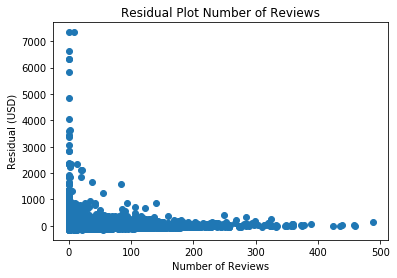

In [172]:
num_rev = ['number_of_reviews']
target1 = ['price']
linregst = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[num_rev], df[target1], test_size=0.25)
linregst.fit(X_train, y_train)

pred_price1 = linregst.predict(X_test)
resid1 = y_test - pred_price1
print("Test Score", linregst.score(X_test, y_test))
print("Train Score", linregst.score(X_train, y_train))

plt.scatter(X_test, resid1)
plt.title("Residual Plot Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Residual (USD)")
plt.show

Test Score -0.0005945314041699845
Train Score -0.0002452055581267931


<function matplotlib.pyplot.show(*args, **kw)>

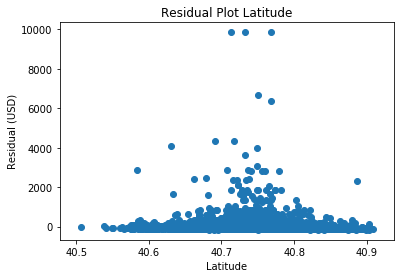

In [173]:
lat = ['latitude']
target2 = ['price']
linregstd = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[lat], df[target2], test_size=0.25)
linregstd.fit(X_train, y_train)

pred_price2 = linregstd.predict(X_test)
resid2 = y_test - pred_price2
print("Test Score", linregst.score(X_test, y_test))
print("Train Score", linregst.score(X_train, y_train))

plt.scatter(X_test, resid2)
plt.title("Residual Plot Latitude")
plt.xlabel("Latitude")
plt.ylabel("Residual (USD)")
plt.show

Test Score 0.0057549276531903
Train Score 0.006930249747195916


<function matplotlib.pyplot.show(*args, **kw)>

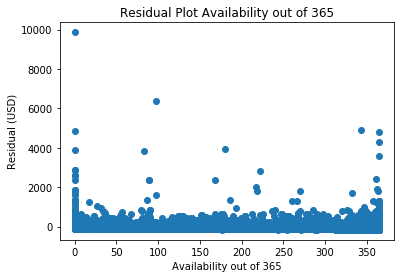

In [174]:
avail = ['availability_365']
target = ['price']
linregs = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[avail], df[target], test_size=0.25)
linregs.fit(X_train, y_train)

pred_price3 = linregs.predict(X_test)
resid3 = y_test - pred_price3
print("Test Score", linregs.score(X_test, y_test))
print("Train Score", linregs.score(X_train, y_train))

plt.scatter(X_test, resid3)
plt.title("Residual Plot Availability out of 365")
plt.xlabel("Availability out of 365")
plt.ylabel("Residual (USD)")
plt.show

0.03467260261375471
0.020225874342725714


<function matplotlib.pyplot.show(*args, **kw)>

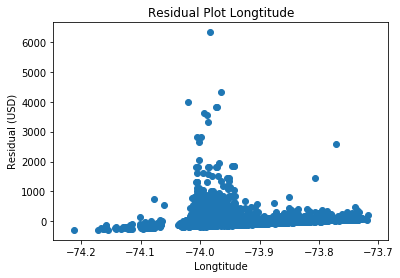

In [176]:
long = ['longitude']
target = ['price']
linregs = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[long], df[target], test_size=0.25)
linregs.fit(X_train, y_train)

pred_price4 = linregs.predict(X_test)
resid4 = y_test - pred_price4
print(linregs.score(X_test, y_test))
print(linregs.score(X_train, y_train))

plt.scatter(X_test, resid4)
plt.title("Residual Plot Longtitude")
plt.xlabel("Longtitude")
plt.ylabel("Residual (USD)")
plt.show

In [102]:
#Initial Linear Regression model
feature_names = ['minimum_nights', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'time_since_collection']
target_names = ['price']
linreg = LinearRegression()
#param_grid = {'test_size' : [0,1]}
#optimal_ts = GridSearchCV(linreg, param_grid)

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_names], test_size=0.25)
linreg.fit(X_train, y_train)
#optimal_ts.fit(X_train, y_train)
#print(optimal_ts.best_params_)
pred_price3 = linreg.predict(X_test)

print(linreg.score(X_test, y_test))
print(linreg.score(X_train, y_train))

0.04001962197196529
0.03603211538274287


In [104]:
#Transforming my continous variables via Log has proven to be unhelpful to my endeavor. Although for record keeping purposes I will keep this cell for now, to make sure I do not repeat the same steps later. 
df['log_min_nights'] = np.log(df['minimum_nights'])
df['log_lat'] = np.log(df['latitude'])
df['log_long'] = np.log(df['longitude'])
df['log_number_reviews'] = np.log(df['number_of_reviews'])
df['log_reviews_month'] = np.log(df['reviews_per_month'])
df['log_avail_365'] = np.log(df['availability_365'])
df['log_time_collect'] = np.log(df['time_since_collection'])
random.seed(0)


log_feature_names = ['log_min_nights', 'log_lat', 'log_long', 'log_number_reviews', 'log_reviews_month', 'log_avail_365', 'log_time_collect']
target_names2 = ['price']

df[log_feature_names] = df[log_feature_names].replace(-np.Inf, np.nan)# Applying Log() to all of our feature variables have proven unhelpful as our score has decreased to ~.016 from our previous measure of ~0.03-0.04
np.any(np.isnan(df[log_feature_names]))
df[log_feature_names] = df[log_feature_names].replace(np.nan, 0)#np.all(np.isfinite(df[log_feature_names])) I've tried removing the negative infinities with Nan and then replacing Nan with 0, the mean for the new dataframe, and median as well. This did not increase the score for our data. 
#Keeping for notes, applying log to all of our test variables have not proven to be fruitful. 

linreg2 = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(df[log_feature_names], df[target_names], test_size=0.25)
linreg2.fit(X_train, y_train)

pred_price4 = linreg.predict(X_test)

print(linreg2.score(X_test, y_test))
print(linreg2.score(X_train, y_train))

0.01748358019927254
0.01630720728059165


C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs

In [105]:
#Testing other Linear Regression Models

feature_names3 = ['minimum_nights',  'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'time_since_collection']
target_names3 = ['price']
LinReg = LinearRegression()
ridge = Ridge(alpha=0.01, normalize=True, solver='saga' )
lasso = Lasso()
EL = ElasticNet()
random.seed(0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df[feature_names3], df[target_names3], test_size=0.25)
LinReg.fit(X_train3, y_train3)
ridge.fit(X_train3, y_train3)
lasso.fit(X_train3, y_train3)
EL.fit(X_train3, y_train3)


LinReg_price = LinReg.predict(X_test3)
ridge_price = ridge.predict(X_test3)
lasso_price = lasso.predict(X_test3)
EL_price = EL.predict(X_test3)




In [106]:
y_test3

,price
34054,130
47462,55
24620,195
10722,429
5301,80
...,...
1395,90
32891,169
37461,100
45731,137


In [109]:
print("Regular Linear Regression Test Score", LinReg.score(X_test3, y_test3))
print("Ridge Regression Test Score", ridge.score(X_test3, y_test3))
print("Lasso Regression Test Score", lasso.score(X_test3, y_test3))
print("Elastic Net Test Score", EL.score(X_test3, y_test3))

print(" ")

print("Regular Linear Regression Train Score", LinReg.score(X_train3, y_train3))
print("Ridge Regression Train Score", ridge.score(X_train3, y_train3))
print("Lasso Regression Train Score", lasso.score(X_train3, y_train3))
print("Elastic Net Train Score", EL.score(X_train3, y_train3))
print(' ')
print("Regular Linear Regression RMSE", np.sqrt(metrics.mean_squared_error(y_test3, LinReg_price)))
print("Ridge Regression RMSE", np.sqrt(metrics.mean_squared_error(y_test3, ridge_price)))
print("Lasso Regression RMSE", np.sqrt(metrics.mean_squared_error(y_test3, lasso_price)))
print("EL Regression RMSE", np.sqrt(metrics.mean_squared_error(y_test3, EL_price)))
print(' ')

print('')

print(ridge.coef_)
#NOTE: Based on our code above, it seems that Ridge Regression would be the way to go, if we do not use regular linear regression, although the difference is negligible
#Another thing to note is that our prediction model has gone as high as .059, which while still far from .10 is progress. If we can tune the Ridge we might be able to obtain optimal results

Regular Linear Regression Test Score 0.0426179600197053
Ridge Regression Test Score 0.042610078604829904
Lasso Regression Test Score 0.030684147604795545
Elastic Net Test Score 0.01465876551336387
 
Regular Linear Regression Train Score 0.03553527702641346
Ridge Regression Train Score 0.03553076308439185
Lasso Regression Train Score 0.025152977159241585
Elastic Net Train Score 0.011774160022364533
 
Regular Linear Regression RMSE 223.12906323510202
Ridge Regression RMSE 223.12998166109367
Lasso Regression RMSE 224.5154135481469
EL Regression RMSE 226.36372544651672
 

[[ 9.97824403e-02  2.13296015e+02 -8.01170702e+02 -2.43372928e-01
  -1.97038786e+00  1.91168063e-01 -2.97361479e-03]]


In [110]:
#Coefficients

In [111]:
coef_ridge = ridge.coef_
coefficient = coef_ridge.tolist()
print(coefficient)

coef1 = []
for f in coefficient:
    for g in f:
        coef1.append(g)
coef_table = zip(feature_names3, coef1)


[[0.09978244027368903, 213.29601547163472, -801.1707017424312, -0.2433729280739838, -1.9703878580999972, 0.19116806290749086, -0.002973614794065617]]


In [112]:
coef_def = tuple(coef_table)
print((coef_def[0], "USD/night"))
print((coef_def[1], "USD/latitude(degree)"))
print((coef_def[2], "USD/longtitude(degree)"))
print((coef_def[3], "USD/review"))
print((coef_def[4], "USD/review per month"))
print((coef_def[5], "USD/availability out of 365"))
print((coef_def[6], "USD/day since last review"))

(('minimum_nights', 0.09978244027368903), 'USD/night')
(('latitude', 213.29601547163472), 'USD/latitude(degree)')
(('longitude', -801.1707017424312), 'USD/longtitude(degree)')
(('number_of_reviews', -0.2433729280739838), 'USD/review')
(('reviews_per_month', -1.9703878580999972), 'USD/review per month')
(('availability_365', 0.19116806290749086), 'USD/availability out of 365')
(('time_since_collection', -0.002973614794065617), 'USD/day since last review')


In [113]:
#Hyperparameter Tuning with Grid Search CV

ridge2 = Ridge()
alphas = [0, 0.001, 0.01, 1, 10, 100]
param_grid = {'alpha': alphas, 'fit_intercept': [True, False], 'normalize': [True, False], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
tuning = GridSearchCV(ridge2, param_grid, cv=5)
tuning.fit(X_train3, y_train3)
tuning_pred = tuning.predict(X_test3)
r2 = tuning.score(X_test3, y_test3)
mse = mean_squared_error(y_test3, tuning_pred)

print("Tuned Ridge  Alpha: {}".format(tuning.best_params_))
#It looks like our optimal alpha here is 1.0 which is also our default. Will need to look further into tuning L2

Tuned Ridge  Alpha: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'sag'}


In [114]:
#Random Forest Regressor Model

In [115]:
#Selected Hyperparameter values that I will tune in Random Forest Model
#Note criterion was one of the methods I explored earlier, but upon attempting to run the model with MAE and after doing
# some research I discovered that models with an MAE criterion are significantly more time consuming then MSE models
#I had attempted to run 3 models, with 3 different N estimators and 3 separate max features, but after 2 hours of waiting
#the model had yet to finish fitting the first model I set up. 

#N_estimators (number of trees), 100, 1000, and 1500 (will monitor the results and add more trees if needed)

#'max_features': ['auto', 'sqrt', 'log2'],#The number of features to consider when looking for the best split: default is "auto"
#If “auto”, then max_features=n_features.
#If “sqrt”, then max_features=sqrt(n_features).
#If “log2”, then max_features=log2(n_features).

In [116]:


collection = ['minimum_nights',  'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'time_since_collection']
X = df[collection].values
y = df.iloc[:, 9].values


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
#No tuning 
est = [100, 1000, 1500]
y_pred = []
reg_score_test = []
reg_score_train = []
for z in est:
    regressor = RandomForestRegressor(n_estimators=z, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred.append(regressor.predict(X_test))
    reg_score_test.append(regressor.score(X_test, y_test))
    reg_score_train.append(regressor.score(X_train, y_train))#like our Linear/Ridge Regression our score is abysmally low



In [119]:
print("Accuracy Score for 100, 1000 and 1500 Trees on Test Set", reg_score_test)
print("Accuracy Score for 100, 1000 and 1500 Trees on Train Set", reg_score_train)

Accuracy Score for 100, 1000 and 1500 Trees on Test Set [0.01847700397913654, 0.03743146619748405, 0.03980403115343656]
Accuracy Score for 100, 1000 and 1500 Trees on Train Set [0.8696839428796297, 0.8716543898162717, 0.8709349947739389]


In [120]:
from sklearn import metrics

print('Mean Absolute Error 100 Trees:', metrics.mean_absolute_error(y_test, y_pred[0]))
print('Mean Squared Error 100 Trees:', metrics.mean_squared_error(y_test, y_pred[0]))
print('Root Mean Squared Error 100 Tree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred[0])))

print(" ")

print('Mean Absolute Error 1000 Trees:', metrics.mean_absolute_error(y_test, y_pred[1]))
print('Mean Squared Error 1000 Trees:', metrics.mean_squared_error(y_test, y_pred[1]))
print('Root Mean Squared Error 1000 Tree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred[1])))

print(" ")

print('Mean Absolute Error 1500 Trees:', metrics.mean_absolute_error(y_test, y_pred[2]))
print('Mean Squared Error 1500 Trees:', metrics.mean_squared_error(y_test, y_pred[2]))
print('Root Mean Squared Error 1500 Tree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred[2])))

Mean Absolute Error 100 Trees: 79.87874846500205
Mean Squared Error 100 Trees: 56995.285118880485
Root Mean Squared Error 100 Tree: 238.73685329014555
 
Mean Absolute Error 1000 Trees: 78.7940199549734
Mean Squared Error 1000 Trees: 55894.63339417367
Root Mean Squared Error 1000 Tree: 236.42045891625722
 
Mean Absolute Error 1500 Trees: 78.75035871196616
Mean Squared Error 1500 Trees: 55756.8627900454
Root Mean Squared Error 1500 Tree: 236.12891138114662


In [121]:
#MSE Criterion (Default) with Max Features = sqrt
est = [100, 1000, 1500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='sqrt', random_state=0)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))#like our Linear/Ridge Regression our score is abysmally low



In [122]:
print("Accuracy Score for 100, 1000 and 1500 Trees on Test Set with Max Features = Sqrt", reg_score_test_mse)
print("Accuracy Score for 100, 1000 and 1500 Trees on Train Se with Max Features = Sqrtt", reg_score_train_mse)

Accuracy Score for 100, 1000 and 1500 Trees on Test Set with Max Features = Sqrt [0.08509778619058905, 0.09846489960987281, 0.09852981412180517]
Accuracy Score for 100, 1000 and 1500 Trees on Train Se with Max Features = Sqrtt [0.8781856603564822, 0.8807598938006876, 0.879744814844042]


In [123]:
print('Mean Absolute Error 100 Trees with Max Features = Sqrt:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Sqrt:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Sqrt:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 1000 Trees with Max Features = Sqrt:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 1000 Trees with Max Features = Sqrt:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 1000 Tree with Max Features = Sqrt:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 1500 Trees with Max Features = Sqrt:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 1500 Trees with Max Features = Sqrt:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 1500 Tree with Max Features = Sqrt:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Sqrt: 76.80253333138413
Mean Squared Error 100 Trees with Max Features = Sqrt: 53126.73543397441
Root Mean Squared Error 100 Tree with Max Features = Sqrt: 230.49237608644327
 
Mean Absolute Error 1000 Trees with Max Features = Sqrt: 75.80325527746916
Mean Squared Error 1000 Trees with Max Features = Sqrt: 52350.531062159265
Root Mean Squared Error 1000 Tree with Max Features = Sqrt: 228.80238430173594
 
Mean Absolute Error 1500 Trees with Max Features = Sqrt: 75.75341353332163
Mean Squared Error 1500 Trees with Max Features = Sqrt: 52346.76159253814
Root Mean Squared Error 1500 Tree with Max Features = Sqrt: 228.7941467619706


In [124]:
#MSE Criterion (Default) with Max Features = log2
est = [100, 1000, 1500]
y_pred_log = []
reg_score_test_log = []
reg_score_train_log = []
for z_log in est:
    regressor = RandomForestRegressor(n_estimators=z_log, max_features='log2', random_state=0)
    regressor.fit(X_train, y_train)
    y_pred_log.append(regressor.predict(X_test))
    reg_score_test_log.append(regressor.score(X_test, y_test))
    reg_score_train_log.append(regressor.score(X_train, y_train))#like our Linear/Ridge Regression our score is abysmally low


In [125]:
print("Accuracy Score for 100, 1000 and 1500 Trees on Test Set with Max Features = log2", reg_score_test_log)
print("Accuracy Score for 100, 1000 and 1500 Trees on Train Se with Max Features = log2", reg_score_train_log)

Accuracy Score for 100, 1000 and 1500 Trees on Test Set with Max Features = log2 [0.08509778619058905, 0.09846489960987281, 0.09852981412180517]
Accuracy Score for 100, 1000 and 1500 Trees on Train Se with Max Features = log2 [0.8781856603564822, 0.8807598938006876, 0.879744814844042]


In [126]:
print('Mean Absolute Error 100 Trees with Max Features = log2:', metrics.mean_absolute_error(y_test, y_pred_log[0]))
print('Mean Squared Error 100 Trees with Max Features = log2:', metrics.mean_squared_error(y_test, y_pred_log[0]))
print('Root Mean Squared Error 100 Tree with Max Features = log2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_log[0])))

print(" ")

print('Mean Absolute Error 1000 Trees with Max Features = log2:', metrics.mean_absolute_error(y_test, y_pred_log[1]))
print('Mean Squared Error 1000 Trees with Max Features = log2:', metrics.mean_squared_error(y_test, y_pred_log[1]))
print('Root Mean Squared Error 1000 Tree with Max Features = log2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_log[1])))

print(" ")

print('Mean Absolute Error 1500 Trees with Max Features = log2:', metrics.mean_absolute_error(y_test, y_pred_log[2]))
print('Mean Squared Error 1500 Trees with Max Features = log2:', metrics.mean_squared_error(y_test, y_pred_log[2]))
print('Root Mean Squared Error 1500 Tree with Max Features = log2:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_log[2])))

Mean Absolute Error 100 Trees with Max Features = log2: 76.80253333138413
Mean Squared Error 100 Trees with Max Features = log2: 53126.73543397441
Root Mean Squared Error 100 Tree with Max Features = log2: 230.49237608644327
 
Mean Absolute Error 1000 Trees with Max Features = log2: 75.80325527746916
Mean Squared Error 1000 Trees with Max Features = log2: 52350.531062159265
Root Mean Squared Error 1000 Tree with Max Features = log2: 228.80238430173594
 
Mean Absolute Error 1500 Trees with Max Features = log2: 75.75341353332163
Mean Squared Error 1500 Trees with Max Features = log2: 52346.76159253814
Root Mean Squared Error 1500 Tree with Max Features = log2: 228.7941467619706


In [127]:
print('       Hyperparameter Tuning Table   ')
print('Model              , Alpha,    ')
print('Ridge Regression     ', 'Value')
print('Alpha                 ', '0.01')
print('Fit Intercept         ', 'True')
print('Normalize             ', 'True')
print('Solver                ', 'Saga')

       Hyperparameter Tuning Table   
Model              , Alpha,    
Ridge Regression      Value
Alpha                  0.01
Fit Intercept          True
Normalize              True
Solver                 Saga


In [128]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,reviews_per_month_isnull,time_since_collection,log_min_nights,log_lat,log_long,log_number_reviews,log_reviews_month,log_avail_365,log_time_collect
count,4.885800e+04,48858,4.885800e+04,48858,48858,48858,48858.000000,48858.000000,48858,48858.000000,...,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.0,48858.000000,48858.000000,48858.000000,48858.000000
unique,NaN,47875,NaN,11450,5,221,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,NaN,417,21643,3917,NaN,NaN,25393,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.902335e+07,NaN,6.763169e+07,NaN,NaN,NaN,40.728941,-73.952170,NaN,152.740309,...,112.801425,0.205432,2757.527774,1.134750,3.706938,0.0,1.831100,-0.428148,2.973051,7.907649
std,1.098289e+07,NaN,7.862389e+07,NaN,NaN,NaN,0.054528,0.046159,NaN,240.232386,...,131.610962,0.404021,408.022047,1.071551,0.001339,0.0,1.652528,1.359575,2.471248,0.186767
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.701297,0.0,0.000000,-4.605170,0.000000,0.000000
25%,9.475980e+06,NaN,7.818669e+06,NaN,NaN,NaN,40.690090,-73.983070,NaN,69.000000,...,0.000000,0.000000,2682.000000,0.000000,3.705985,0.0,0.000000,-1.272966,0.000000,7.894318


In [129]:
print('                                 Hyperparameter Tuning Table   ')
print('')
print('Model ',  'Alpha',  'Normalize',  'Solver',  'N_Estimators(Trees)',  'Max_Features',   'Test Score',   'Train Score',  'Test RSME(USD)')
print('')
print('Ridge  0.01    True     saga         N/A                N/A        0.035      0.038         242.31')
print('RFR     N/A    N/A      N/A          100                Auto       0.018      0.869         238.74')
print('RFR     N/A    N/A      N/A         1000                Auto       0.037      0.871         236.42')
print('RFR     N/A    N/A      N/A         1500                Auto       0.040      0.871         236.12')
print('RFR     N/A    N/A      N/A          100                Sqrt       0.085      0.878         230.49')
print('RFR     N/A    N/A      N/A         1000                Sqrt       0.098      0.881         228.80')
print('RFR     N/A    N/A      N/A         1500                Sqrt       0.099      0.879         228.79')
print('RFR     N/A    N/A      N/A          100                Log2       0.085      0.878         230.49')
print('RFR     N/A    N/A      N/A         1000                Log2       0.098      0.881         228.80')
print('RFR     N/A    N/A      N/A         1500                Log2       0.099      0.880         228.79')


                                 Hyperparameter Tuning Table   

Model  Alpha Normalize Solver N_Estimators(Trees) Max_Features Test Score Train Score Test RSME(USD)

Ridge  0.01    True     saga         N/A                N/A        0.035      0.038         242.31
RFR     N/A    N/A      N/A          100                Auto       0.018      0.869         238.74
RFR     N/A    N/A      N/A         1000                Auto       0.037      0.871         236.42
RFR     N/A    N/A      N/A         1500                Auto       0.040      0.871         236.12
RFR     N/A    N/A      N/A          100                Sqrt       0.085      0.878         230.49
RFR     N/A    N/A      N/A         1000                Sqrt       0.098      0.881         228.80
RFR     N/A    N/A      N/A         1500                Sqrt       0.099      0.879         228.79
RFR     N/A    N/A      N/A          100                Log2       0.085      0.878         230.49
RFR     N/A    N/A      N/A         1000 